In [2]:
import pandas as pd 
import matplotlib
from FileOpener.CSVReader.CSVReader import CSVReader as csv 
from FileOpener.backtester import FinancialBacktest

%matplotlib inline

## 코스피

In [3]:
filename = 'KOSPI_FROM_1998_close.csv'
directory = 'CSVFile/Price/Korea/Stocks'

kse_price = csv.price_reader(filename, directory)

In [4]:
filename = 'DIV_OR_NOT_KSE.csv'
directory = 'CSVFile/FinancialData/Korea'

kse_divd = csv.financial_reader(filename, directory)

## 코스닥

In [5]:
filename = 'KOSDAQ_FROM_1998_close.csv'
directory = 'CSVFile/Price/Korea/Stocks'

kdq_price = csv.price_reader(filename, directory)

In [6]:
filename = 'DIV_OR_NOT_KDQ.csv'
directory = 'CSVFile/FinancialData/Korea'

kdq_divd = csv.financial_reader(filename, directory)

## 분석을 위한 백테스팅 오브젝트 지정

In [7]:
KOSPI = FinancialBacktest(kse_price)
KOSDAQ = FinancialBacktest(kdq_price)

## 각 시장별 배당 주식 판별

In [8]:
kse_divd.head()

,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A298050,A298690,A300720,A306200,A900030,A900050,A900140,A950010,A950070,A950100
Code,,,,,,,,,,,,,,,,,,,,,
2000-12-31,NaN,20010329.0,NaN,NaN,20010102.0,20010329.0,20000629.0,NaN,NaN,20010102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-31,NaN,20020328.0,20011227.0,NaN,20011227.0,20020328.0,20010628.0,NaN,NaN,20011227.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-12-31,NaN,20030328.0,20021227.0,NaN,20021227.0,20030328.0,20021227.0,NaN,NaN,20021227.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-31,NaN,20040330.0,20031229.0,NaN,20031229.0,20040330.0,20031229.0,NaN,NaN,20031229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-31,NaN,20050330.0,NaN,NaN,NaN,20050330.0,20041229.0,NaN,NaN,20041229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
kdq_divd.head()

,A000250,A000380,A000440,A000530,A000550,A000600,A000870,A001000,A001540,A001810,...,A900290,A900300,A900310,A900340,A950030,A950110,A950130,A950140,A950160,A950170
Code,,,,,,,,,,,,,,,,,,,,,
2000-12-31,20010102.0,NaN,20000928.0,NaN,NaN,NaN,NaN,NaN,20010102.0,20010102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-31,20011227.0,20011227.0,20010927.0,NaN,NaN,NaN,NaN,NaN,20011227.0,20011227.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-12-31,20021227.0,20021227.0,20020927.0,NaN,NaN,NaN,NaN,NaN,20021227.0,20021227.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-31,20031229.0,20031229.0,20030929.0,NaN,NaN,NaN,NaN,NaN,20031229.0,20031229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-31,20041229.0,NaN,20040924.0,NaN,NaN,NaN,NaN,NaN,20041229.0,20041229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 만약 해당 년도에 배당락이 걸려있지 않은 경우 NaN / 배당락이 걸려있는 경우 Not Nan

In [10]:
kse_div = ~kse_divd.isnull()
kdq_div = ~kdq_divd.isnull()

In [11]:
kse_div.head()

,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A298050,A298690,A300720,A306200,A900030,A900050,A900140,A950010,A950070,A950100
Code,,,,,,,,,,,,,,,,,,,,,
2000-12-31,False,True,False,False,True,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2001-12-31,False,True,True,False,True,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2002-12-31,False,True,True,False,True,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2003-12-31,False,True,True,False,True,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2004-12-31,False,True,False,False,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [12]:
kdq_div.head()

,A000250,A000380,A000440,A000530,A000550,A000600,A000870,A001000,A001540,A001810,...,A900290,A900300,A900310,A900340,A950030,A950110,A950130,A950140,A950160,A950170
Code,,,,,,,,,,,,,,,,,,,,,
2000-12-31,True,False,True,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2001-12-31,True,True,True,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2002-12-31,True,True,True,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2003-12-31,True,True,True,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2004-12-31,True,False,True,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


## 해당시기 Listed 되지 않은 주식을 판별할 필요가 있음 

### 다행히 클래스 내에서 판별 함수를 반영

In [14]:
kospi_div_stock = KOSPI.stock_screen(screen=kse_div, freq = 'A')
kosdaq_div_stock = KOSDAQ.stock_screen(screen=kdq_div, freq = 'A')

In [15]:
for key, value in kospi_div_stock.items():
    
    print(f"{key.strftime('%y.%m.%d')}: {len(value)}")

00.12.31: 390
01.12.31: 385
02.12.31: 422
03.12.31: 448
04.12.31: 462
05.12.31: 483
06.12.31: 502
07.12.31: 510
08.12.31: 462
09.12.31: 494
10.12.31: 534
11.12.31: 517
12.12.31: 501
13.12.31: 485
14.12.31: 495
15.12.31: 503
16.12.31: 531
17.12.31: 546


In [25]:
for key, value in kosdaq_div_stock.items():
    
    print(f"{key.strftime('%y.%m.%d')}: {len(value)}")

00.12.31: 299
01.12.31: 348
02.12.31: 364
03.12.31: 359
04.12.31: 404
05.12.31: 417
06.12.31: 415
07.12.31: 417
08.12.31: 338
09.12.31: 402
10.12.31: 440
11.12.31: 448
12.12.31: 454
13.12.31: 438
14.12.31: 481
15.12.31: 499
16.12.31: 530
17.12.31: 564


## 백테스트

### 당해 보고서에 배당락일이 공시된 종목을 다음해 1월부터 12월 말까지 보유 후 1년간 리밸런싱 하는 전략

In [16]:
kospi_divd_rt = KOSPI.backtest(screen=kse_div,freq_date='A',freq_stock='A')
kosdaq_divd_rt = KOSDAQ.backtest(screen=kdq_div,freq_date='A',freq_stock='A')

## 코스피

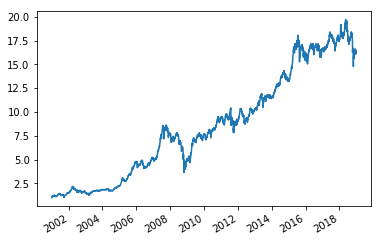

In [17]:
kospi_divd_rt.sub(-1).cumprod().plot()

## 코스닥

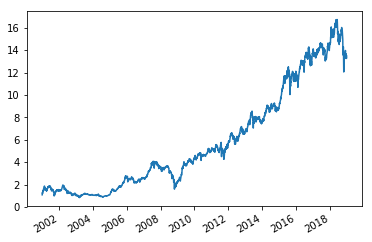

In [18]:
kosdaq_divd_rt.sub(-1).cumprod().plot()

## 배당을 공시하지 않은 주식의 수익률

## 각 시장 별 배당 공시를 하지 않는 주식의 수

In [19]:
kospi_div_not_stock = KOSPI.stock_screen(screen=~kse_div, freq = 'A')
kosdaq_div_not_stock = KOSDAQ.stock_screen(screen=~kdq_div, freq = 'A')

In [20]:
for key, value in kospi_div_not_stock.items():
    
    print(f"{key.strftime('%y.%m.%d')}: {len(value)}")

00.12.31: 353
01.12.31: 364
02.12.31: 318
03.12.31: 269
04.12.31: 250
05.12.31: 221
06.12.31: 199
07.12.31: 203
08.12.31: 262
09.12.31: 248
10.12.31: 216
11.12.31: 237
12.12.31: 251
13.12.31: 262
14.12.31: 250
15.12.31: 252
16.12.31: 227
17.12.31: 222


In [21]:
for key, value in kospi_div_not_stock.items():
    
    print(f"{key.strftime('%y.%m.%d')}: {len(value)}")

00.12.31: 353
01.12.31: 364
02.12.31: 318
03.12.31: 269
04.12.31: 250
05.12.31: 221
06.12.31: 199
07.12.31: 203
08.12.31: 262
09.12.31: 248
10.12.31: 216
11.12.31: 237
12.12.31: 251
13.12.31: 262
14.12.31: 250
15.12.31: 252
16.12.31: 227
17.12.31: 222


## 배당을 공시하지 않은 주식의 1년간 백테스팅

In [22]:
kospi_divd_not_rt = KOSPI.backtest(screen=~kse_div,freq_date='A',freq_stock='A')
kosdaq_divd_not_rt = KOSDAQ.backtest(screen=~kdq_div,freq_date='A',freq_stock='A')

## 코스피

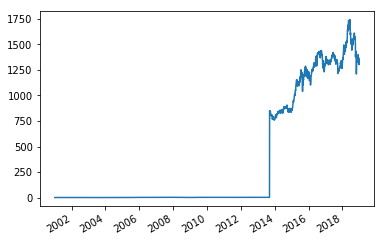

In [23]:
kospi_divd_not_rt.sub(-1).cumprod().plot()

## 주의 

### 코스피의 경우 극단값이 있어서 수익률이 튐. 이를 조정해주어야 함

만약 일일 수익률이 0.3을 넘길 경우 이를 0.3으로 조정

In [24]:
KOSPI_rt = KOSPI.ret()
KOSPI_rt[KOSPI_rt > 0.3] = 0.3
norm_list, st_list, ed_list = KOSPI.back_date(~kse_div, 'A')
stocks = KOSPI.stock_screen(~kse_div, 'A')

KOSPI_divd_not_adj_rt = pd.Series()

In [25]:
for n_start, start, end in zip(norm_list, st_list, ed_list):

    KOSPI_divd_not_adj_rt = pd.concat([KOSPI_divd_not_adj_rt, KOSPI_rt[stocks[n_start]].loc[start:end].mean(axis=1)])

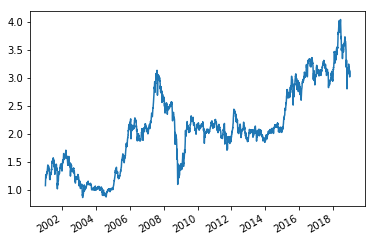

In [26]:
KOSPI_divd_not_adj_rt.sub(-1).cumprod().plot()

## 코스닥

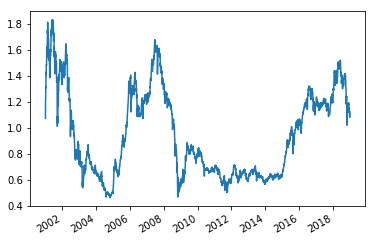

In [27]:
kosdaq_divd_not_rt.sub(-1).cumprod().plot()

## 성과평가

In [28]:
from FileOpener.backtester import PfAnalysis

## 코스피

In [29]:
pf_kosdaq_divd = PfAnalysis(kosdaq_divd_rt)
pf_kosdaq_divd_not = PfAnalysis(kosdaq_divd_not_rt)

In [30]:
print("Maximum Drawdown")
print("")
print(f"KOSDAQ_Dividend: {abs(round(pf_kosdaq_divd.maxDrawDown() * 100, 2))}%")
print(f"KOSDAQ_Not_Dividend: {abs(round(pf_kosdaq_divd_not.maxDrawDown() * 100, 2))}%")

Maximum Drawdown

KOSDAQ_Dividend: 58.59%
KOSDAQ_Not_Dividend: 68.67%


In [31]:
kdq_div_prod_rt = kosdaq_divd_rt.sub(-1).prod() - 1
kdq_div_not_prod_rt = kosdaq_divd_not_rt.sub(-1).prod() - 1

In [32]:
print("Total Return")
print("")
print(f"KOSDAQ_Dividend: {round(kdq_div_prod_rt * 100, 2)}%")
print(f"KOSDAQ_Not_Dividend: {round(kdq_div_not_prod_rt * 100, 2)}%")

Total Return

KOSDAQ_Dividend: 1251.79%
KOSDAQ_Not_Dividend: 12.72%


## 코스닥

In [33]:
pf_kospi_divd = PfAnalysis(kospi_divd_rt)
pf_kospi_divd_not = PfAnalysis(KOSPI_divd_not_adj_rt)

In [34]:
print("Maximum Drawdown")
print("")
print(f"KOSDAQ_Dividend: {abs(round(pf_kospi_divd.maxDrawDown() * 100, 2))}%")
print(f"KOSDAQ_Not_Dividend: {abs(round(pf_kospi_divd_not.maxDrawDown() * 100, 2))}%")

Maximum Drawdown

KOSDAQ_Dividend: 56.54%
KOSDAQ_Not_Dividend: 61.38%


In [35]:
kse_div_prod_rt = kospi_divd_rt.sub(-1).prod() - 1
kse_div_not_prod_rt = KOSPI_divd_not_adj_rt.sub(-1).prod() - 1

In [36]:
print("Total Return")
print("")
print(f"KOSDAQ_Dividend: {round(kse_div_prod_rt * 100, 2)}%")
print(f"KOSDAQ_Not_Dividend: {round(kse_div_not_prod_rt * 100, 2)}%")

Total Return

KOSDAQ_Dividend: 1531.42%
KOSDAQ_Not_Dividend: 212.29%


## CAGR 연습함수

In [39]:
from dateutil import relativedelta

In [54]:
date = pd.to_datetime('2017-01-01')
date_1 = pd.to_datetime('2018-06-30')

In [61]:
dayobj = relativedelta.relativedelta(date_1, date)
year = dayobj.years
month = dayobj.months
days = 1 if dayobj.days > 15 else 0

In [67]:
def cagr(data, date_1, date_0):

    ret = data + 1

    dayobj = relativedelta.relativedelta(date_1, date_0)
    year = dayobj.years
    month = dayobj.months
    days = 1 if dayobj.days > 15 else 0

    return ret ** (1/ (year + (month+days)/12))

In [70]:
cagr(kse_div_not_prod_rt, KOSPI_divd_not_adj_rt.index[-1], KOSPI_divd_not_adj_rt.index[0])

1.065308908604625